# Exercise 6.2

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#importing data using path shortcut

path1 = r'/Users/elysegross/Documents/Data Analytics/A6/'
df_emissions = pd.read_csv(os.path.join(path1, 'Data', '2019 Emissions Clean.csv'))


## Questions to Explore with Analysis

Which type of power plant emits the most CO2?

Which state has the highest emitters?

How does region affect emissions?

How do emissions and fuel consumption correlate?

How do useful thermal outputs compared to overall 
    generation vary by fuel (aka which is most 
    efficient to produce)?

### Variables these questions will need

In [3]:
#View the data to see which variables we have.

df_emissions.head()

,Unnamed: 0,Plant Code,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),...,Fuel Consumption for Electric Generation (MMBtu),\n Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Fuel Units,Tons of CO2 Emissions,Metric Tonnes of CO2 Emissions,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region
0,0,1,Sand Point,AK,ELECTRIC POWER,2.0,IC,DFO,PET,2.758000e+06,...,28934.0,0.0,4967.0,Barrels,2333.38,2116.83,NaN,NaN,Balancing Authority Not Reported,Alaska
1,1,3,Barry,AL,ELECTRIC POWER,1.0,CA,NG,GAS,2.824887e+09,...,1499638.0,0.0,1475594.0,Mcf,87728.21,79586.51,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
2,2,3,Barry,AL,ELECTRIC POWER,1.0,CT,NG,GAS,5.306391e+09,...,55606180.0,0.0,54733332.0,Mcf,3252938.83,2951046.74,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
3,3,3,Barry,AL,ELECTRIC POWER,1.0,ST,BIT,COAL,4.174904e+09,...,41521966.0,0.0,2045976.0,Tons,4270348.31,3874034.57,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast
4,4,3,Barry,AL,ELECTRIC POWER,1.0,ST,NG,GAS,1.646248e+08,...,1662458.0,0.0,1615087.0,Mcf,97253.11,88227.45,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast


#### We will want:

-Plant Name

-State

-Sector Group

-Aggregated Fuel Group

-Generation (kWh)

-Quantity of Fuel Consumed

-Tons of CO2 Emissions

In [4]:
#Create a subset with only the variables wanted

sub = df_emissions[['Plant Name', 'State', 'Sector Group', 'Aggregated Fuel Group','Generation (kWh)', 'Quantity of Fuel Consumed', 'Tons of CO2 Emissions']]


In [5]:
sub.head()

,Plant Name,State,Sector Group,Aggregated Fuel Group,Generation (kWh),Quantity of Fuel Consumed,Tons of CO2 Emissions
0,Sand Point,AK,ELECTRIC POWER,PET,2.758000e+06,4967.0,2333.38
1,Barry,AL,ELECTRIC POWER,GAS,2.824887e+09,1475594.0,87728.21
2,Barry,AL,ELECTRIC POWER,GAS,5.306391e+09,54733332.0,3252938.83
3,Barry,AL,ELECTRIC POWER,COAL,4.174904e+09,2045976.0,4270348.31
4,Barry,AL,ELECTRIC POWER,GAS,1.646248e+08,1615087.0,97253.11


# Correlation Matrix Heatmap

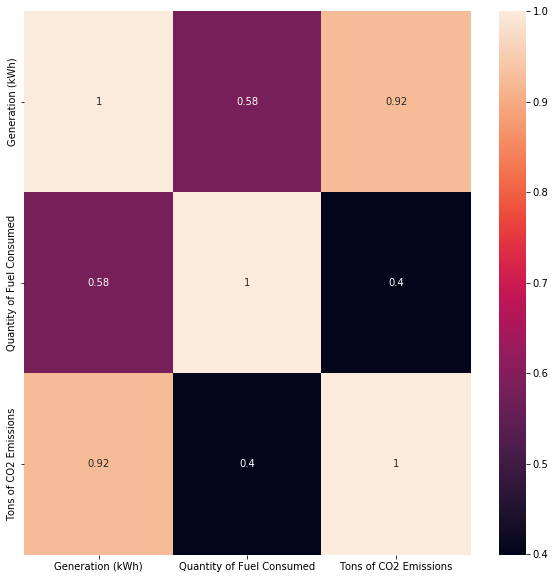

In [6]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.


This correlation matrix heatmap shows the relationships between the variables. There is a strong positive relationship between Generation and Tons of CO2 Emissions. There are also positive relationships between Quantity of Fuel Consumed and Generation as well as Quantity of Fuel Consumed and Tons of CO2 Emissions. 

# Scatteporlots

### Generation (kWh) and Tons of CO2 Emissions

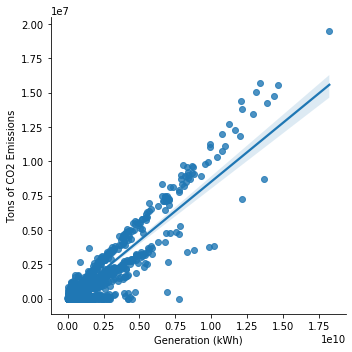

In [7]:
# Create a scatterplot for the "Generation" and "Tons of CO2 Emissions" columns in seaborn

sns.lmplot(x = 'Generation (kWh)', y = 'Tons of CO2 Emissions', data = df_emissions)


This scatterplot shows that the correlation is actually linear and strongly positive.

### Quantity of Fuel Consumed and Generation (kWh)

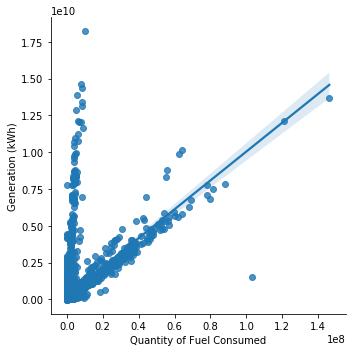

In [8]:
# Create a scatterplot for the "Generation" and "Tons of CO2 Emissions" columns in seaborn

sns.lmplot(x = 'Quantity of Fuel Consumed', y = 'Generation (kWh)', data = df_emissions)


This scatterplot shows us there are actually two different sets of correlation within this data. The correlation heatmap did not show the whole story since there are a lot of datapoints nowhere near the line.

### Quantity of Fuel Consumed and Tons of CO2 Emissions.

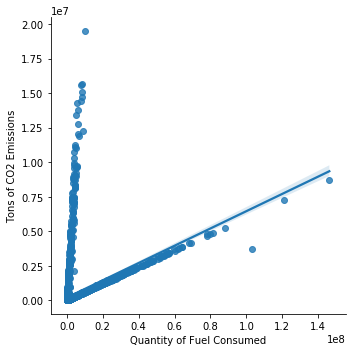

In [9]:
# Create a scatterplot for the "Generation" and "Tons of CO2 Emissions" columns in seaborn

sns.lmplot(x = 'Quantity of Fuel Consumed', y = 'Tons of CO2 Emissions', data = df_emissions)


This is very similar to the scatterplot for the previous variables but there are two very tight sets of datapoints. We see that for all powerplants, more fuel consumption is correlated with more emissions, but some see a vastly higher uptick in emissions with higher fuel consumption (those on the far left). 

# Pair Plots

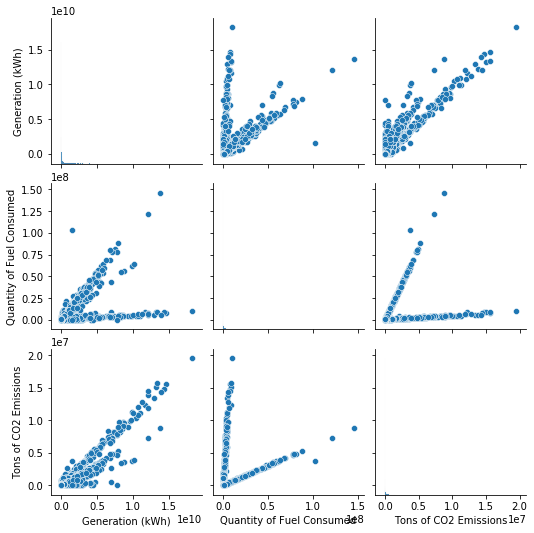

In [10]:
# Create a pair plot 

g = sns.pairplot(sub)

These pair plots show me similar insights to what I saw in the previous plots. I would like to look more into the relationship between CO2 Emissions and Generation because there is a clear positive relationship. I would also like to look further into the relationship between Quantity of Fuel Consumed and Generation to understand why some points are not on the same line as others.

# Categorial Plot

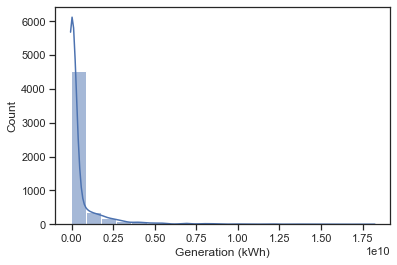

In [44]:
sns.histplot(df_emissions['Generation (kWh)'], bins = 20, kde = True)


In [38]:
df_emissions.describe()

,Unnamed: 0,Sector Code,Generation (kWh),Useful Thermal Output (MMBtu),Total Fuel Consumption (MMBtu),Fuel Consumption for Electric Generation (MMBtu),\n Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Tons of CO2 Emissions,Metric Tonnes of CO2 Emissions
count,5319.000000,5317.000000,5.317000e+03,5.317000e+03,5.317000e+03,5.317000e+03,5.317000e+03,5.317000e+03,5.317000e+03,5.317000e+03
mean,2659.000000,2.427685,4.888060e+08,1.900053e+05,4.557313e+06,4.280653e+06,2.926414e+05,2.539645e+06,3.574952e+05,3.243175e+05
std,1535.607372,2.015527,1.356127e+09,9.610648e+05,1.364091e+07,1.349381e+07,1.439853e+06,8.036204e+06,1.257768e+06,1.141040e+06
min,0.000000,1.000000,-6.454300e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1329.500000,1.000000,3.240000e+05,0.000000e+00,3.188000e+03,2.266000e+03,0.000000e+00,5.940000e+02,2.380600e+02,2.159700e+02
50%,2659.000000,2.000000,1.150900e+07,0.000000e+00,1.188870e+05,7.618200e+04,0.000000e+00,4.617100e+04,7.165150e+03,6.500180e+03
75%,3988.500000,3.000000,2.190110e+08,0.000000e+00,1.720804e+06,1.146922e+06,0.000000e+00,9.869140e+05,1.082860e+05,9.823638e+04
max,5318.000000,7.000000,1.823766e+10,1.689925e+07,1.820195e+08,1.820195e+08,2.693293e+07,1.462194e+08,1.950239e+07,1.769246e+07


In [131]:
df_emissions.loc[df_emissions['Generation (kWh)'] < .0001e+10, 'Fuel Generation Category'] = 'Low Fuel Generation'


In [141]:
df_emissions.loc[(df_emissions['Generation (kWh)'] >= .0001e+10) & (df_emissions['Generation (kWh)'] < .01e+10), 'Fuel Generation Category'] = 'Middle Fuel Generation'


In [142]:
df_emissions.loc[df_emissions['Generation (kWh)'] > .01e+10, 'Fuel Generation Category'] = 'High Fuel Generation'


In [143]:
df_emissions['Fuel Generation Category'].value_counts(dropna = False)

Middle Fuel Generation    1997
Low Fuel Generation       1663
High Fuel Generation      1657
NaN                          2
Name: Fuel Generation Category, dtype: int64

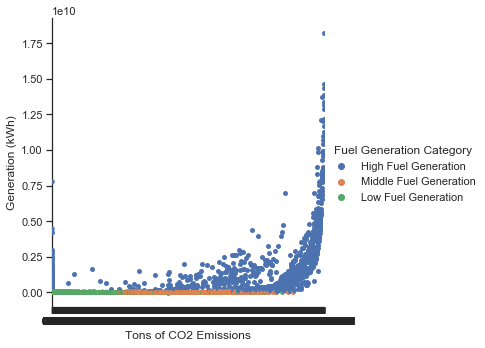

In [144]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Tons of CO2 Emissions", y="Generation (kWh)", hue="Fuel Generation Category", data=df_emissions)


This catplot shows me that most of the High CO2 Emitting Plants are also High Fuel Generators. This makes sense since if they are producing more fuel they are probably emitting more. I would like to look into how this breaks down by fuel types.

# Answering the Questions

#### Question 1. Which type of power plant emits the most CO2?

The answer to this is not found in the above visualizations. However, I would like to look further how this occurs using a bar chart as well as categorically plotting these on the scatterplots used above.

#### Question 2. Which state has the highest emitters? 

These visualizations did not give insight into this. However, I could create a catgeorical plot by state to discover this. Alternatively, a simple bar chart with states on the x axis and Emissions on the y axis would be my choice for this.

#### Question 3. How does region affect emissions? 

Like above, this was not shown in the visualizations but could, again, be visualized using the same methods.

#### Question 4. How do emissions and fuel consumption correlate? 

We saw this in the correlations above. Higher fuel consumption is positively correlated with higher CO2 Emissions.

#### Question 5. How do useful thermal outputs compared to overall generation vary by fuel (aka which is most efficient to produce)? 
    
This was not shown in my visualizations but I could create a categorical plot similar to the one but use "Fuel Consumption for Useful Thermal Output (MMBtu)" on the y axis (keeping Generation on the x).

# Hypotheses

If a power plant consumes more fuel or generates more energy (kWh) then it will emit more CO2.

Different power plant types probably have different fuel consumption and generation amounts which will effect their CO2 emissions.

# THE END!